In [17]:
# http://www.rpgroup.caltech.edu/ncbs_pboc/code/t04_chemical_master_equations.html

In [2]:
def master_equation(prob, k, dt):
    """
    Computes the master equation for diffusion in one dimension.
    
    Parameters
    ----------
    prob : 2d-array
        Array in which the probabiilities will be stored. This should be in
        the shape of N boxes by m time points. This should have a preset initial
        condition. 
    k : float
        Jump rate of particles between boxes in units of 1/s. 
    dt : float
        Time step for our integration. This should be in units of seconds and
        should be sufficiently smaller than our jump rate for numerical stability.
        
    Returns
    -------
    prob: 2d-array
        The probability vector given to the function where each element now
        contains a computed probability.
    """
    
    # We'll first figure out the total number of boxes and the number 
    # of time steps we will integrate over. This will essentially be the
    # shape of our prob array. 
    num_boxes, time_points = np.shape(prob)
    
    # We need to integrate over each time step. Since we have the initial 
    # condition  set, we can start at time step '2' which is 1 in Python. 
    for t in range(1, time_points): 
        # Now we will need to deal with the boundary conditions. If we are 
        # at box 0, we can't deal with box -1. Likewise, if we are in the
        # final box, we can't deal with box +1. There are more clever 
        # ways we could deal with this, but for right now we can just compute
        # these two cases explicity. 
        prob[0, t] = prob[0, t-1] + k * dt * prob[1, t-1] - k * dt * prob[0, t-1]
       
        # Identify the index of the last box.
        last_box = num_boxes - 1
        prob[last_box, t] = prob[last_box, t-1] + \
                                k * dt * prob[last_box-1, t-1] -\
                                k * dt * prob[last_box, t-1]
                
        # With the boundary conditions in place, we can now iterate over 
        # all other boxes and repeat this procedure. 
        for box in range(1, num_boxes - 1):
            prob[box, t] = prob[box, t-1] + k * dt * prob[box-1, t-1] +\
                           k * dt * prob[box+1, t-1] -\
                           2 * k * dt * prob[box, t-1]
                
    # Now we've integrated over all time steps for each box and can just 
    # return our array
    return prob

In [3]:
# Define the parameters. 
k = 5  # Jump  frequency in inverse seconds. 
dt = 1 / 50  # Time step sufficiently smaller than the jump frequency.
num_boxes = 80  # The total number of boxes 
time_steps = 100  # Total time of the integration in units of seconds.

In [4]:
import numpy as np

# Set up the probability array and set the initial condition
prob = np.zeros((num_boxes, time_steps))

# The intial condition will be a delta function in the middle of our box. 
initial_position = int(num_boxes/ 2) - 1  # -1 for indexing at 0.
prob[initial_position, 0] = 1.0

In [5]:
# Execute the integration
prob = master_equation(prob, k, dt)

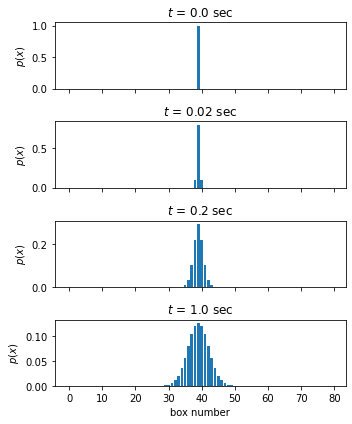

In [6]:
import matplotlib.pyplot as plt

# Determine the number of time points.
time_points = [0, 1,10, 50]

# Define the array of boxes.
bins = np.arange(0, num_boxes, 1)

# Set up the figure. This will return the same number of axes as we 
# have time points.
fig, ax = plt.subplots(nrows=len(time_points), ncols=1, sharex=True,
                      figsize=(5, 6))

# Loop through the time points and make the bar plot.
for i in range(len(time_points)):
    ax[i].bar(bins, prob[:, time_points[i]])
    
    # Set a title so we know the time point and convert it to seconds.
    ax[i].set_title('$t$ = %s sec' %(time_points[i] * dt))
    ax[i].set_ylabel('$p(x)$')
    
# Add an xlabel and clean up the plot.
ax[-1].set_xlabel('box number')

# This command will automatically adjust the spacing between plots to make things
# more aesthetically pleasing.
plt.tight_layout() 

In [7]:
cb.bar_plot?

Object `cb.bar_plot` not found.


In [8]:
# http://www.rpgroup.caltech.edu/ibdm_cbbtn/programming

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import glob
import skimage.io
import skimage.measure
import skimage.filters

def bar_plot (data, n_slices, dx = 1, dy = 1, z_max = 1, x_label = 'x',
              y_label='y', z_label='z', elev_angle = 30, azim_angle = 115):
    """
    Makes a 3d bar plot of the data given as a 2d numpy array.

    Parameters
    ----------
    data: 2d-array
        Two-dimensional numpy array of z-values
    n_slices: int
        Number of 'slices' in y-directions to be used in the 3D plot
    dx: float
        Distance between neighboring x-positions
    dy: float
        Distance between neighboring y-positions
    x_label: str
        Label of the x-axis
    y_label: str
        Label of the y-axis
    z_lable: str
        Label of the z-axis
    elev_angle: int
        Alevation viewing angle
    azim_angle: int
        Azimuthal viewing angle
    z_max: float
        Default limit to the z-axis

    Returns
    -------
    fig: pyplot figure object
        Figure of the 3d-plot

    ax: pyplot axes object
        Axes object that contains the figure elements
    """

    # Initialize the figure object
    fig = plt.figure(figsize = [10, 8])
    ax = fig.add_subplot(111, projection='3d')

    # Colors to indicate variation in y-axis
    colors = sns.color_palette('YlGnBu_r', n_colors=n_slices+1)

    # Dimensions of the 2d-array
    x_length, y_length = data.shape

    # Initial index of the slice
    i_slice = 0

    # Iterate through each slice and add bar plots
    for y in np.arange(0, y_length, y_length//n_slices):

        # x-, y- and z-positions
        x_pos = np.arange(x_length)*dx
        y_pos = y*np.ones(x_length)*dy
        z_pos = np.zeros(x_length)

        # Horizontal dimensions of the bars
        delta_x = dx*np.ones(x_length)
        delta_y = 2*dy*np.ones(x_length)

        # Heights in the z-direction
        delta_z = data[:,y]

        ax.bar3d(x_pos, y_pos, z_pos, delta_x, delta_y, delta_z,
                 color = colors[i_slice], edgecolor='none')

        i_slice = i_slice + 1;

    # Add axis labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    # Adjust the 3d viewing angle of the plot
    ax.view_init(elev_angle, azim_angle)

    # Set the z-limit of the plot
    z_max = np.min([z_max, np.max(data)])
    ax.set_zlim([0, z_max])

    return fig, ax


def create_mask (phase_image, gauss_radius = 50, threshold = -0.2, \
                 pixel_size = 0.16, area_low = 1, area_high = 5):

    # Normalize
    im_float = (phase_image - np.min(phase_image))/(np.max(phase_image)-np.min(phase_image))

    # Find the background
    im_bg = skimage.filters.gaussian(im_float, gauss_radius)

    # Subtract the background
    im_gauss = im_float - im_bg

    # Threshold the image
    im_thresh = im_gauss < threshold

    # Label the image
    im_label = skimage.measure.label(im_thresh)

    # Obtain the features of the objects
    props = skimage.measure.regionprops(im_label)

    # Remove small objects
    im_mask = np.zeros_like(im_label)
    for prop in props:
        area = prop.area * pixel_size**2
        if (area > area_low) and (area < area_high):
            im_mask = im_mask + (im_label == prop.label)

    # Label the mask
    im_mask_label = skimage.measure.label(im_mask)

    # Return the labeled mask
    return im_mask_label


def find_intensities (im_yfp, im_mask_label):

    # List to store the object intensity values
    intensities = []

    # Obtain the features of objects in the YFP channel
    props = skimage.measure.regionprops(im_mask_label, intensity_image=im_yfp)

    # Add the YFP intensity values
    for prop in props:
        intensities.append(prop.mean_intensity)

    return intensities


def find_intensities_all (operator, repressor):
    # Array to store intensity values from all the strains
    intensities_all = []

    # Filename structure
    file_structure_phase = 'data/lacI_titration/' + operator + '_' + repressor + '_' + 'phase*'
    file_structure_yfp = 'data/lacI_titration/' + operator + '_' + repressor + '_' + 'yfp*'

    # Name of all images for a given strain
    phase_names = glob.glob(file_structure_phase)
    yfp_names = glob.glob(file_structure_yfp)

    # Number of positions
    n_positions = len(phase_names)

    for i in range(n_positions):
        im_phase = skimage.io.imread(phase_names[i])
        im_yfp = skimage.io.imread(yfp_names[i])

        im_mask_label = create_mask(im_phase)
        intensities = find_intensities(im_yfp, im_mask_label)

        for intensity in intensities:
            intensities_all.append(intensity)

    return intensities_all

(<Figure size 720x576 with 1 Axes>,
 <Axes3DSubplot:xlabel='position', ylabel='time [sec]'>)

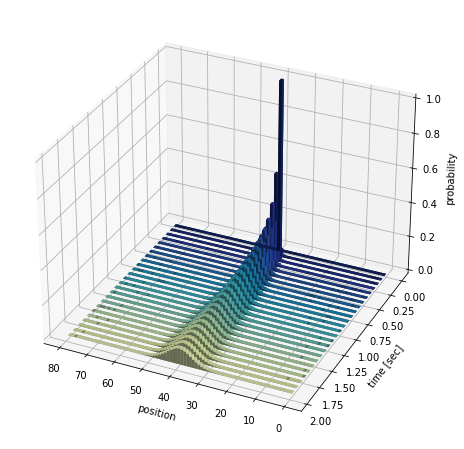

In [9]:
# Generate the 3D bar plot. 
bar_plot(prob, 25, dx=1, dy=dt, x_label='position', 
            y_label='time [sec]', z_label='probability')

# Frustration

In [10]:
def master_equation3(prob, L,d, k1, k2, dt):

    num_boxes, time_points = np.shape(prob)
     
    for t in range(1, time_points): 

        prob[0, t] = prob[0, t-1] + k1(L,d,1) * dt * prob[1, t-1] - k2(L,d,0) * dt * prob[0, t-1]
       
        last_box = num_boxes - 1
        prob[last_box, t] = prob[last_box, t-1] + \
                                k1(L,d,last_box-1) * dt * prob[last_box-1, t-1] -\
                                k2(L,d,last_box) * dt * prob[last_box, t-1]
                
        for box in range(1, num_boxes - 1):
            prob[box, t] = prob[box, t-1] +\
                            k1(L,d,box-1) * dt * prob[box-1, t-1] +\
                            k2(L,d,box+1) * dt * prob[box+1, t-1] -\
                            (k1(L,d,box)+k2(L,d,box)) * dt * prob[box, t-1]
            
            if prob[box, t] > 1:
                print(box,t,prob[box, t])

            
    return prob

In [11]:
d = 0
L = 40

def k1(L,d,x):
    
    return (4*x**2 - d**2)/(2*L*(L-1))

def k2(L,d,x):
    
    return (4*x**2 + (1-2*L)*2*x + L*(L-1))/(2*L*(L-1))


dt = 1 / 50
num_boxes = L
time_steps = 1000

import numpy as np

prob = np.zeros((num_boxes, time_steps))

print(np.shape(prob))

initial_position = int(num_boxes/ 2) - 1


prob[initial_position, 0] = 1.0

print(prob)

prob = master_equation3(prob, L, d, k1 , k2, dt)

(40, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


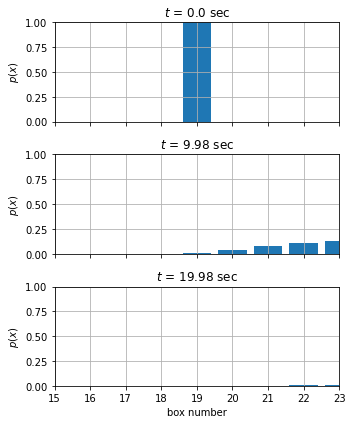

In [12]:
import matplotlib.pyplot as plt

#time_points = [0, 1, 25, 50]

time_points = [0, int(time_steps/ 2) - 1 ,time_steps-1]

bins = np.arange(0, num_boxes, 1)

fig, ax = plt.subplots(nrows=len(time_points), ncols=1, sharex=True,
                      figsize=(5, 6))
for i in range(len(time_points)):
    ax[i].bar(bins, prob[:, time_points[i]])
    
    ax[i].set_title('$t$ = %s sec' %(time_points[i] * dt))
    ax[i].set_ylabel('$p(x)$')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(initial_position-L*0.1,initial_position+L*0.1)
        
    ax[i].grid()
    
ax[-1].set_xlabel('box number')

plt.tight_layout() 

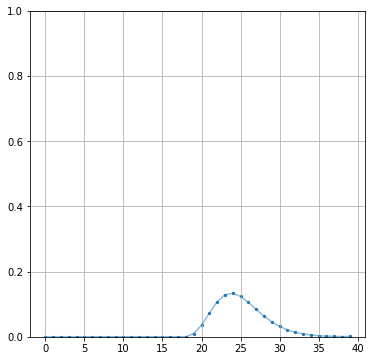

In [13]:
i= 500

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter([i for i in range(len(prob[:,i]))],prob[:,i],s=5)

ax.plot([i for i in range(len(prob[:,i]))],prob[:,i],alpha=0.5)


ax.set_ylim(0,1)
plt.grid()

plt.show()
    

In [17]:
np.shape(prob)

(40, 1000)

In [19]:
for ps in prob:
    print(ps)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.18586796e-57
 6.32897176e-56 6.60082172e-55 4.80811815e-54 2.74611572e-53
 1.30929070e-52 5.41877367e-52 1.99918344e-51 6.70197654e-51
 2.07107136e-50 5.96581598e-50 1.61612657e-49 4.14698939e-49
 1.01395063e-48 2.37399681e-48 5.34497111e-48 1.16137147e-47
 2.44288272e-47 4.98780972e-47 9.90873171e-47 1.91924772e-46
 3.63120059e-46 6.72186959e-46 1.21924325e-45 2.16983420e-45
 3.79331015e-45 6.52133950e-45 1.10359653e-44 1.84005055e-44
 3.02519069e-44 4.90803325e-44 7.86313768e-44 1.24479062e-43
 1.94834606e-43 3.01677966e-43 4.62327798e-43 7.01602375e-43
 1.05477145e-42 1.57155938e-42 2.32153645e-42 3.40133187e-42
 4.94422289e-42 7.13280550e-42 1.02156397e-41 1.45289942e-41
 2.05250998e-41 2.880867

[0.         0.00925641 0.01833208 0.02722967 0.0359518  0.04450104
 0.05287996 0.06109106 0.06913683 0.07701973 0.08474217 0.09230655
 0.09971521 0.10697048 0.11407465 0.12103    0.12783875 0.13450311
 0.14102525 0.14740733 0.15365145 0.15975971 0.16573417 0.17157687
 0.17728981 0.18287498 0.18833432 0.19366977 0.19888324 0.20397658
 0.20895167 0.21381033 0.21855435 0.22318553 0.2277056  0.23211631
 0.23641937 0.24061645 0.24470922 0.24869931 0.25258836 0.25637794
 0.26006965 0.26366502 0.26716559 0.27057287 0.27388836 0.27711351
 0.28024979 0.28329863 0.28626142 0.28913957 0.29193444 0.2946474
 0.29727977 0.29983288 0.30230801 0.30470646 0.30702949 0.30927833
 0.31145422 0.31355838 0.31559199 0.31755623 0.31945228 0.32128126
 0.32304432 0.32474256 0.32637709 0.32794898 0.32945931 0.33090913
 0.33229948 0.33363139 0.33490585 0.33612387 0.33728644 0.3383945
 0.33944903 0.34045096 0.34140122 0.34230072 0.34315036 0.34395103
 0.34470362 0.34540897 0.34606794 0.34668138 0.3472501  0.347774

In [18]:
dt

0.02

<IPython.core.display.Javascript object>


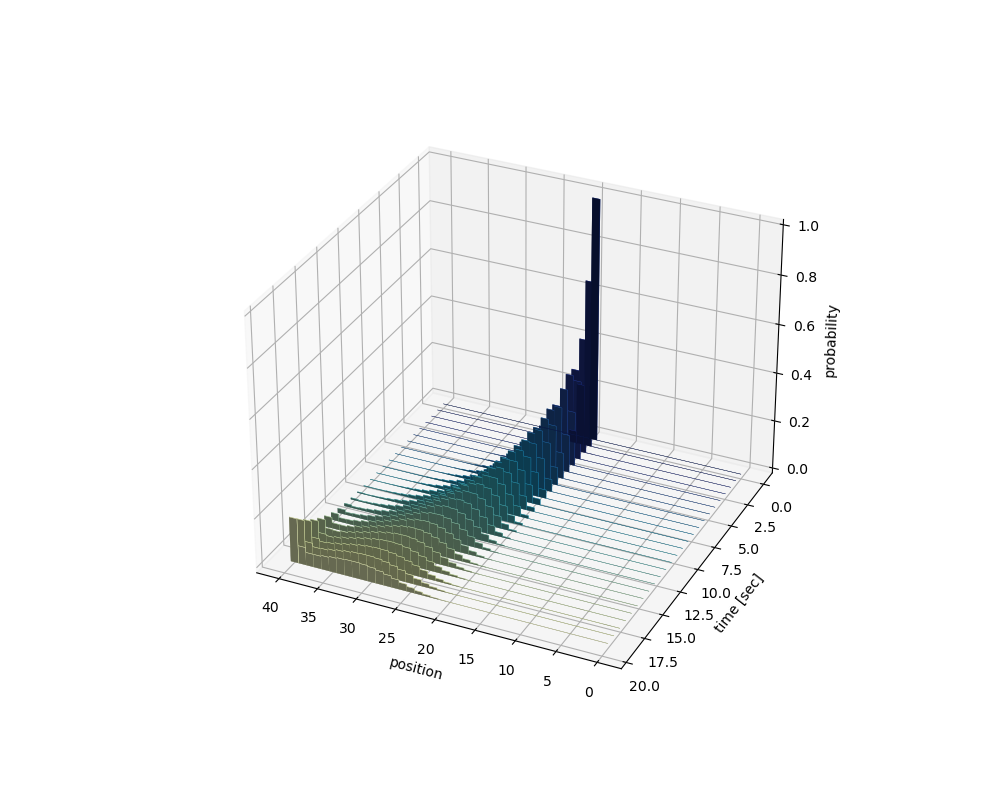

In [15]:
%matplotlib notebook

# Generate the 3D bar plot. 
bar_plot(prob, 25, dx=1, dy=dt, x_label='position', 
            y_label='time [sec]', z_label='probability')
plt.show()

<IPython.core.display.Javascript object>


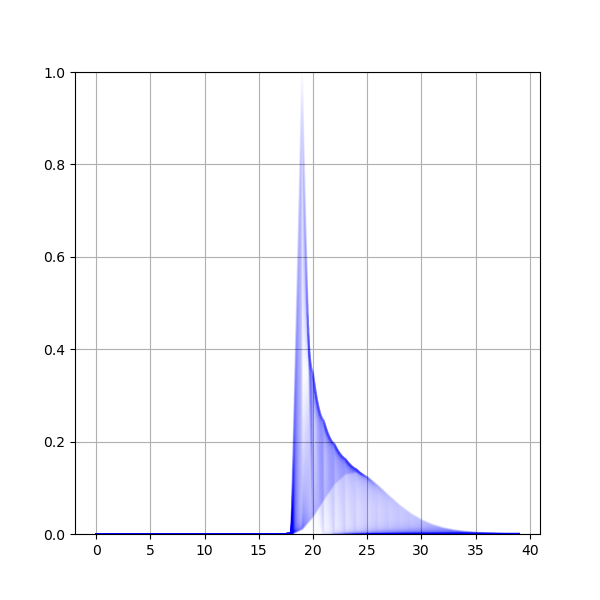

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

for i in range(0,500):

    #ax.scatter([i for i in range(len(prob[:,i]))],prob[:,i],s=5)

    ax.plot([i for i in range(len(prob[:,i]))],prob[:,i],alpha=0.01,color="blue")#,linestyle="--")
    ax.set_ylim(0,1)
    
    
#plt.xlim(0,20)
plt.grid()

plt.show()
    

# Adding Delta Parameter limit

In [494]:
def master_equation3(prob, L,d, k1, k2, dt):

    num_boxes, time_points = np.shape(prob)
     
    for t in range(1, time_points): 

        prob[d, t] = prob[d, t-1] + k1(L,d,d+1) * dt * prob[d+1, t-1] - k2(L,d,d) * dt * prob[d, t-1]
       
        last_box = num_boxes - 1
        prob[last_box, t] = prob[last_box, t-1] + \
                                k1(L,d,last_box-1) * dt * prob[last_box-1, t-1] -\
                                k2(L,d,last_box) * dt * prob[last_box, t-1]
                
        for box in range(1, num_boxes - 1):
            prob[box, t] = prob[box, t-1] +\
                            k1(L,d,box-1) * dt * prob[box-1, t-1] +\
                            k2(L,d,box+1) * dt * prob[box+1, t-1] -\
                            (k1(L,d,box)+k2(L,d,box)) * dt * prob[box, t-1]
            
            if prob[box, t] > 1:
                print(box,t,prob[box, t])

            
    return prob

In [498]:
d = 12
L = 40

def k1(L,d,x):
    
    return (4*x**2 - d**2)/(2*L*(L-1))

def k2(L,d,x):
    
    return (4*x**2 + (1-2*L)*2*x + L*(L-1))/(2*L*(L-1))


dt = 1 / 50
num_boxes = L
time_steps = 1000

import numpy as np

prob = np.zeros((num_boxes, time_steps))
#initial_position = int(num_boxes/ 2) - 1
initial_position = d
prob[initial_position, 0] = 1.0

print(initial_position)

prob = master_equation3(prob, L, d, k1 , k2, dt)

12


<IPython.core.display.Javascript object>


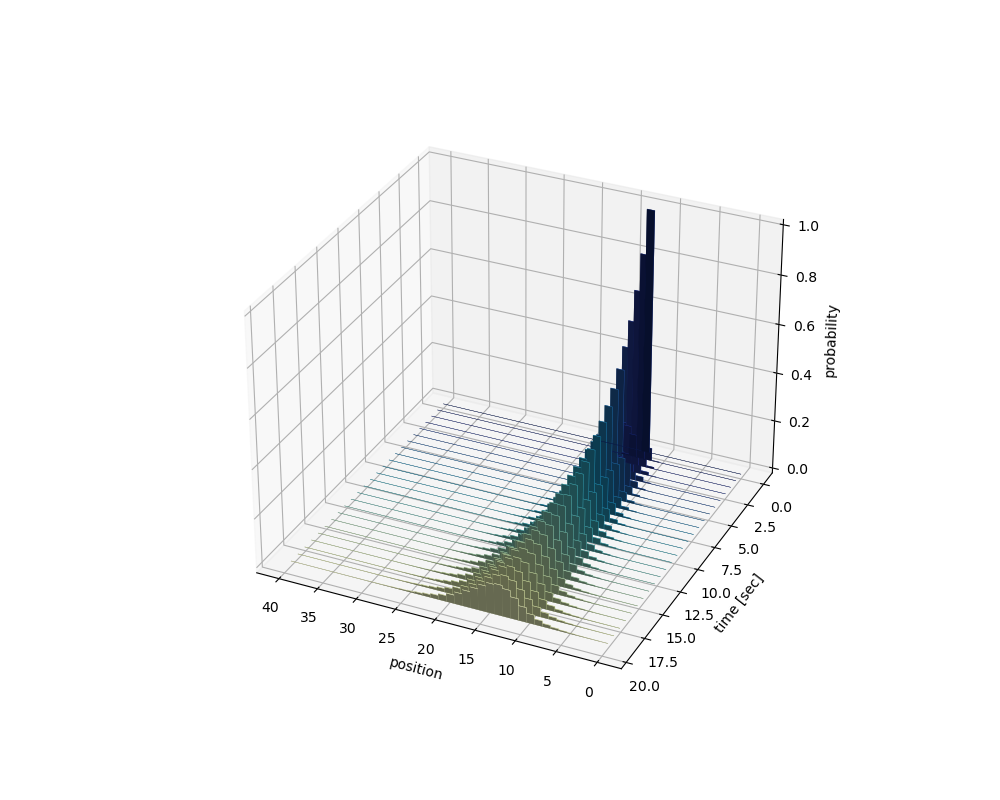

In [499]:
%matplotlib notebook

# Generate the 3D bar plot. 
bar_plot(prob, 25, dx=1, dy=dt, x_label='position', 
            y_label='time [sec]', z_label='probability')
plt.show()

<IPython.core.display.Javascript object>


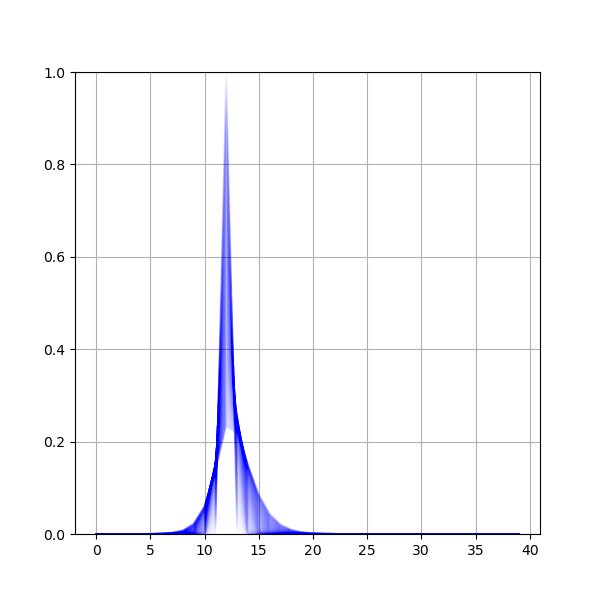

In [500]:
fig, ax = plt.subplots(figsize=(6,6))

for i in range(0,500):

    #ax.scatter([i for i in range(len(prob[:,i]))],prob[:,i],s=5)

    ax.plot([i for i in range(len(prob[:,i]))],prob[:,i],alpha=0.01,color="blue")#,linestyle="--")
    ax.set_ylim(0,1)
    
    
#plt.xlim(0,20)
plt.grid()

plt.show()
    